In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skopt import gp_minimize
from skopt.space import Integer, Real
from skopt.plots import plot_convergence, plot_evaluations
os.chdir('/Users/vitalijstarikov/PycharmProjects/Shell_hachakton_2023')
from src.commons.utils import get_depot_param_space, get_refinery_param_space
from src.supply_chain_opt.greedy_algorithm import Greedy_algorithm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/Biomass_History.csv', index_col=0)
dist = pd.read_csv('data/Distance_Matrix.csv', index_col=0)
biomass_2010 = data['2010']

# Greedy Algorithm
GA = Greedy_algorithm(biomass = biomass_2010,
                      dist = dist)

# Get space for depot optimization
space_depot, number_of_depots = get_depot_param_space(biomass=biomass_2010)
GA.number_of_depots = number_of_depots

# Optimize depot locations
GA.optimize = True
res_depot = gp_minimize(GA.objective_depot, space_depot, n_calls=100)
GA.optimize = False
depot_cost, _, biomass_demand_supply_solution = GA.objective_depot(space=res_depot.x)

# Get space for refinery optimization
space_refinery, number_of_refineries = get_refinery_param_space(biomass=GA.depot_biomass_supply)
GA.number_of_refineries = number_of_refineries

# Optimize refinery locations
GA.optimize = True
res_refinery = gp_minimize(GA.objective_refinery, space_refinery, n_calls=100)
GA.optimize = False
refinery_cost, _, pellet_demand_supply_solution = GA.objective_refinery(space=res_refinery.x)

Optimal number of depots is 18.
Optimal number of refineries is 1.


Text(0.5, 1.0, 'Spatial Biomass Distribution')

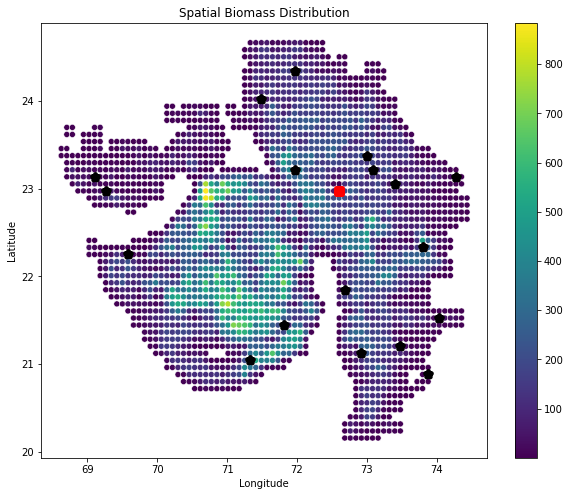

In [3]:
year = '2010'

plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data=data, x='Longitude', y='Latitude', hue=year, palette='viridis')

norm = plt.Normalize(data[year].min(), data[year].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
ax.get_legend().remove()
ax.figure.colorbar(ax=ax, mappable=sm)

for loc in res_depot.x[:-1]:
    y,x = data.iloc[loc,[0]].values[0], data.iloc[loc,[1]].values[0]
    ax.scatter(x,y, label=f'Depot {loc} location', marker='*', color='black', linewidth=5)
for loc in res_refinery.x:
    y,x = data.iloc[loc, [0]].values[0], data.iloc[loc, [1]].values[0]
    ax.scatter(x,y, label=f'Refinery {loc} location', marker='s', color='red', linewidth=5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Biomass Distribution')

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

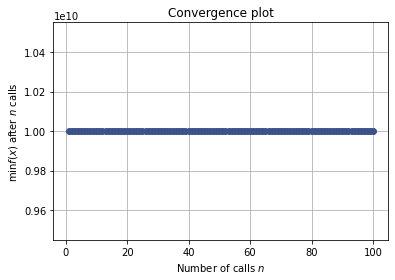

In [4]:
plot_convergence(res_depot)

In [5]:
depot_cost + refinery_cost

314177.4411371612

In [6]:
GA.depot_biomass_supply.sum()

83279.564710822

In [7]:
biomass_2010.sum()*0.8

279330.1146778576

In [8]:
GA.refinery_pellet_supply

882    83279.564711
dtype: float64

In [9]:
res_depot.x

[1367,
 2150,
 674,
 688,
 171,
 2302,
 1714,
 1380,
 561,
 2185,
 827,
 2213,
 772,
 1950,
 845,
 77,
 1982,
 709,
 0.5835680455174408]

In [10]:
GA.depot_biomass_supply

1367    7344.989223
2150    3549.069446
674     8897.332115
688     3512.545193
171     5801.645156
2302      24.409815
1714    4172.789424
1380    6431.764580
561     8268.259111
2185    5847.302496
827     6449.548634
2213    5813.753399
772      818.500284
1950    1615.066614
845     2826.571478
77      7457.236675
1982    3686.885691
709      761.895376
dtype: float64

In [13]:
k = [1.2, 3.042, 2.321, 5.1]
kx = np.round(k).astype('int')